# Scaling
## Feature Scaling :
- Keeping all continuous values in the same (scale / interval/ range).
- Because of larger values column, small value columns are dominated but for ML, each feature should be given equal priority/ weightage.
- Sol: **Feature Scaling** it's not for all algorithms Ex: distance, KNN, Linear Regression
- Unitless.
  
#### 3 Popular Types of Feature Scaling:
1. **Min-Max Scaling** (0 - 1)
   - Scales down the values b/w min and max value. (Min 0 - Max 1)
   - Mathematical Formula =>  x' = x - min(x) / max(x) - min(x)
   - When to use: Min-max scaling is typically applicable to continuous and numeric feature values.
2. **Sandard Scaling / Z- Method** (-3 - +3)
   - It scales down the data with mean and standard deviation.
   - mean μ = 0 and std σ = 1
   - x' = x - μ / σ
   - When to use : If the data follows normal distribution (Guassian Distribution)
   - Charecteristics of ND:
     - mean ≃ median ≃ mode
     - skew & kurto = 0
     - Bell Shaped Curve
     - Symmetric w.r.t mean
     - Area = 1
     - Empirical rule (68%,95%,99.7%)
3. **Robust Scaling** (0 - 1)
   - Scales the data with median and IQR.
   - Median = 0 and IQR = 1
   - x' = x - Median(x) / IQR   Or x - Q2 / IQR
   - IQR = Q3 - Q1
   - When to use : If having the more outliers then we can use Robust Scaling.

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv(r"C:\Users\91830\Downloads\Data Science  Course\Machine Learning\Tabular Data\loandata.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001722,Male,Yes,0,Graduate,No,150,1800.0,135.0,360.0,1.0,Rural,N
1,LP002502,Female,Yes,2,Not Graduate,NaN,210,2917.0,98.0,360.0,1.0,Semiurban,Y
2,LP002949,Female,No,3+,Graduate,NaN,416,41667.0,350.0,180.0,NaN,Urban,N
3,LP002603,Female,No,0,Graduate,No,645,3683.0,113.0,480.0,1.0,Rural,Y
4,LP001644,NaN,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y


In [4]:
df['ApplicantIncome'].isna().sum()

0

## Min-Max Scaling

In [5]:
from sklearn.preprocessing import MinMaxScaler

In [6]:
minmax = MinMaxScaler()

In [7]:
df['minmax'] = minmax.fit_transform(df[['ApplicantIncome']])

In [8]:
df['minmax'].min()
# df['minmax'].max()

0.0

## Standard Scaling

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
ss = StandardScaler()

In [18]:
df['standard'] = ss.fit_transform(df[['ApplicantIncome']])

In [19]:
df['standard'].mean()

4.628942903974594e-17

In [22]:
df['standard'].std(ddof = 0)

1.0

### RObust Scaling

In [23]:
from sklearn.preprocessing import RobustScaler

In [24]:
rob = RobustScaler()

In [26]:
df['robust'] = rob.fit_transform(df[['ApplicantIncome']])

In [27]:
df['robust'].quantile(0.75) - df['robust'].quantile(0.25)

1.0

# Discretization / Binning / Grouping
- The process of transforming continous data to (interval or discreate or categorical).

In [9]:
from sklearn.preprocessing import KBinsDiscretizer

In [14]:
bin = KBinsDiscretizer(n_bins=3,encode='ordinal')

In [10]:
bin = KBinsDiscretizer(n_bins=3)

In [15]:
bin.fit_transform(df[['ApplicantIncome']])

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [13]:
pd.DataFrame(bin.fit_transform(df[['ApplicantIncome']]).toarray(),columns=bin.get_feature_names_out(),dtype=int)

,ApplicantIncome_0.0,ApplicantIncome_1.0,ApplicantIncome_2.0
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
609,0,0,1
610,0,0,1
611,0,0,1
612,0,0,1


In [12]:
pd.DataFrame(bin.fit_transform(df[['ApplicantIncome']]),columns=bin.get_feature_names_out(),dtype=int)

ValueError: setting an array element with a sequence.

In [40]:
bin.bin_edges_

array([array([  150.        ,  3166.        ,  4863.33333333, 81000.        ])],
      dtype=object)

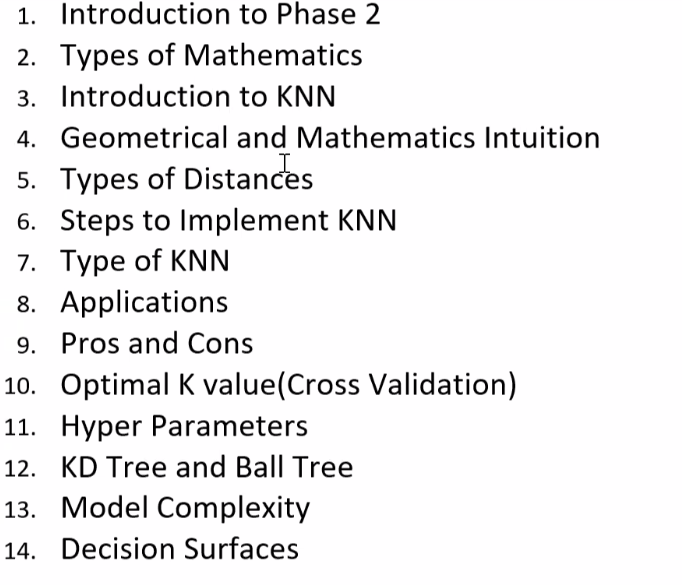

# Summary 
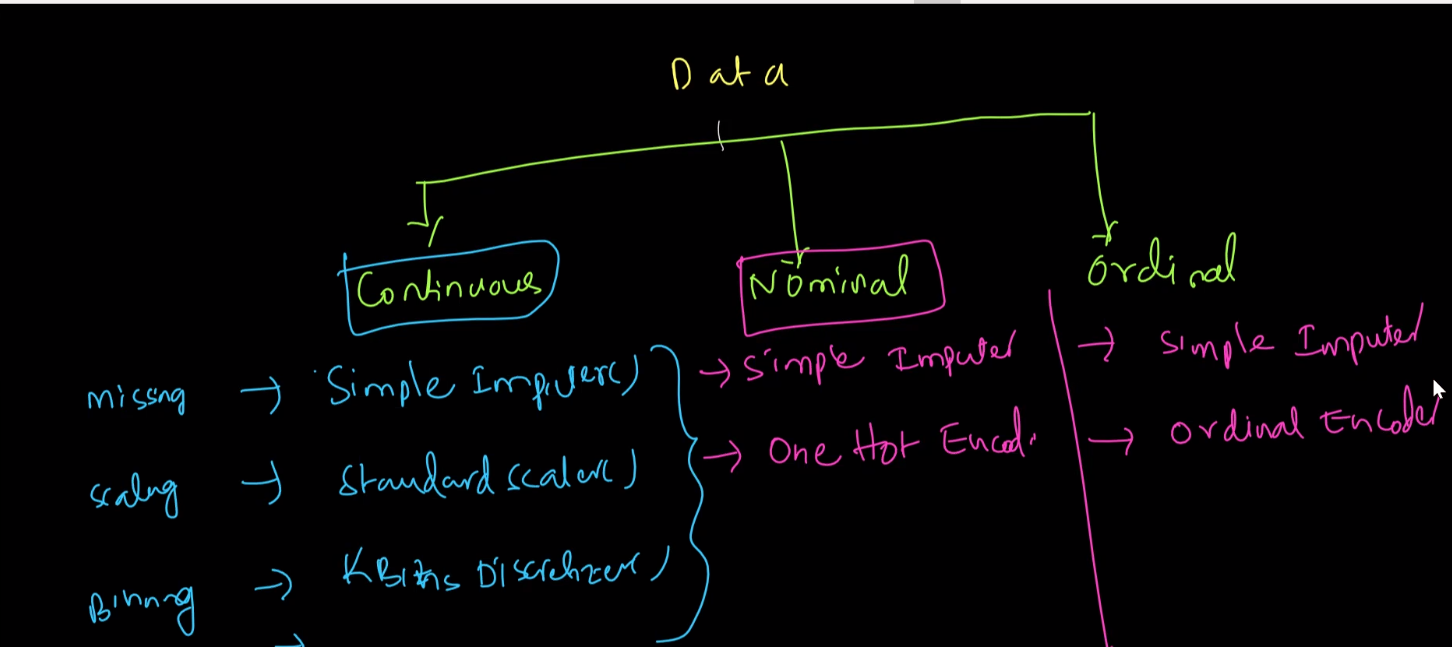

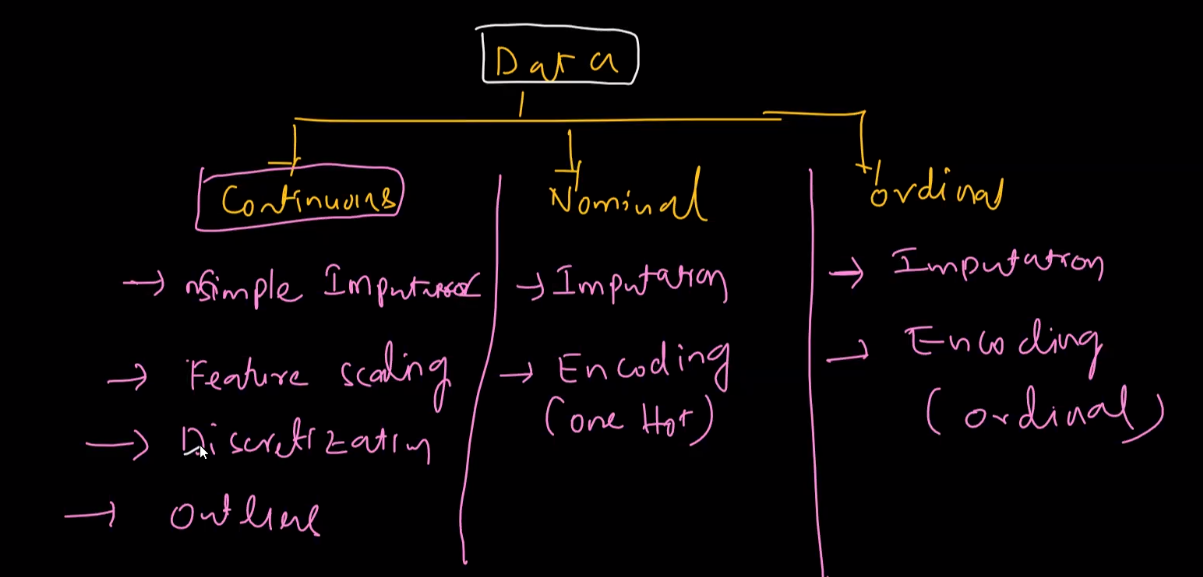